# Create 12 (non-scaled) samples

In [3]:
import sys
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
# Source input directory with complete Painter by Numbers dataset
input_dir_1 = os.getcwd() + '/data/painters/train/'
input_dir_2 = os.getcwd() + '/data/painters/test/'

In [5]:
# Output directory for 12 crops
output_dir = os.getcwd() + '/data/12_crops/'
if not os.path.exists(output_dir): os.makedirs(output_dir)

In [6]:
def create_corner_crops(f):
    s = 299           # Crop size
    i = Image.open(f) # Open image
    i = i.convert(mode='RGB')
    w = i.width       # Image width
    h = i.height      # Image height
    ws = w - s        # Image width - crop size
    hs = h - s        # Image height - crop size
    
    # Fix images which are too small
    if w < s:
        if w <= h:
            i = i.resize((s,int((s/w)*h)), resample=True)
            w = i.width       # New image width
            h = i.height      # New image height
            ws = w - s        # New image width - crop size
            hs = h - s        # New image height - crop size
    if h < s:
        i = i.resize((int((s/h)*w),s), resample=True)
        w = i.width       # New image width
        h = i.height      # New image height
        ws = w - s        # New image width - crop size
        hs = h - s        # New image height - crop size

    # Detect image orientation
    if (w <= h): 
        l = i.crop(box=(0,int((h-w)/2),w,int(((h-w)/2)+w))) # Portrait orientation (or square)
    else:
        l = i.crop(box=(int((w-h)/2),0,int(((w-h)/2)+h),h)) # Landscape orientation

    x0 = i.crop(box=(int((w/2)-(s/2)),int((h/2)-(s/2)),(int((w/2)-(s/2))+s),(int((h/2)-(s/2))+s))) # Center crop   
    x1 = l.resize((s,s), resample=True) # Full painting cropped to square
    
    x2 = i.crop(box=(0,0,s,s)) # Top left corner
    x3 = i.crop(box=(w-s,0,w,s)) # Top right corner
    x4 = i.crop(box=(0,h-s,s,h)) # Bottom left corner
    x5 = i.crop(box=(w-s,h-s,w,h)) # Bottom right corner

    # ----------------------
    # Coordinates for top, right, bottom and left crops
    if h < 2*s:
        q1 = 0
        q5 = h-s
    else:
        q1 = int((h/4)-(s/2))
        q5 = int((h*3/4)-(s/2))
        
    q2 = q1+s
    q6 = q5+s
    q3 = int((h/2)-(s/2))
    q4 = q3+s

    if w < 2*s:
        r1 = 0
        r5 = w-s
    else:
        r1 = int((w/4)-(s/2))
        r5 = int((w*3/4)-(s/2))

    r2 = r1+s
    r6 = r5+s
    r3 = int((w/2)-(s/2))
    r4 = r3+s
    # End of coordinates
    # ----------------------

    x6 = i.crop(box=(r3,q1,r4,q2)) # Top
    x7 = i.crop(box=(r5,q3,r6,q4)) # Right
    x8 = i.crop(box=(r3,q5,r4,q6)) # Bottom
    x9 = i.crop(box=(r1,q3,r2,q4)) # Left
    
    # ----------------------
    # When image is exactly 299, than do not random crop
    if ws <= 1:
        z1 = 0
        z3 = 0
    else:
        z1 = np.random.randint(0,ws)
        z3 = np.random.randint(0,ws)
    if hs <= 1:
        z2 = 0
        z4 = 0
    else:
        z2 = np.random.randint(0,hs)
        z4 = np.random.randint(0,hs)
    # End random crop
    # ----------------------
        
    y1 = i.crop(box=(z1,z2,z1+s,z2+s)) # Random crop
    y2 = i.crop(box=(z3,z4,z3+s,z4+s)) # Random crop

    return x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, y1, y2

In [7]:
# Load dataset selection
img_details = pd.read_csv(os.getcwd() + '/data/balanced_256_split.csv')

file_names = list(img_details['filename'].values)

set_labels = list(img_details['set'].values)
set_folders = np.unique(list(img_details['set']))

artist_labels = list(img_details['artist'].values)
artist_folders = np.unique(list(img_details['artist']))

print('Files total:', len(file_names))
print('Artists:', len(artist_folders))
print('Sets:', len(set_folders))

Files total: 17664
Artists: 69
Sets: 3


In [8]:
# Create output set folders and artist folders within for 12 crops
for set_path in set_folders:
    if not os.path.exists(output_dir + set_path + '/'):
        os.makedirs(output_dir + set_path + '/')
        
    for artist_path in artist_folders:
        if not os.path.exists(output_dir + set_path + '/' + artist_path + '/'):
            os.makedirs(output_dir + set_path + '/' + artist_path + '/')

In [ ]:
# 12 crops
for f in tqdm(range(len(file_names))):
    
    file_id = int(file_names[f][:-4])
    current_set = set_labels[f]
    current_artist = artist_labels[f]
    
    # Locate file in train or test folder of Painter by Numbers dataset
    if os.path.isfile(input_dir_1 + file_names[f]):
        input_dir = input_dir_1
    else:
        input_dir = input_dir_2
    
    f_x0 = '%s/%d.jpg'%(output_dir + current_set + '/' + current_artist, file_id)
    f_x1 = '%s/%d-x1.jpg'%(output_dir + current_set + '/' + current_artist, file_id)
    f_x2 = '%s/%d-x2.jpg'%(output_dir + current_set + '/' + current_artist, file_id)
    f_x3 = '%s/%d-x3.jpg'%(output_dir + current_set + '/' + current_artist, file_id)
    f_x4 = '%s/%d-x4.jpg'%(output_dir + current_set + '/' + current_artist, file_id)
    f_x5 = '%s/%d-x5.jpg'%(output_dir + current_set + '/' + current_artist, file_id)
    f_x6 = '%s/%d-x6.jpg'%(output_dir + current_set + '/' + current_artist, file_id)
    f_x7 = '%s/%d-x7.jpg'%(output_dir + current_set + '/' + current_artist, file_id)
    f_x8 = '%s/%d-x8.jpg'%(output_dir + current_set + '/' + current_artist, file_id)
    f_x9 = '%s/%d-x9.jpg'%(output_dir + current_set + '/' + current_artist, file_id)
    f_y1 = '%s/%d-y1.jpg'%(output_dir + current_set + '/' + current_artist, file_id)
    f_y2 = '%s/%d-y2.jpg'%(output_dir + current_set + '/' + current_artist, file_id)
    
    # skip if files exist
    if os.path.isfile(f_x0) and \
        os.path.isfile(f_x1) and \
        os.path.isfile(f_x2) and \
        os.path.isfile(f_x3) and \
        os.path.isfile(f_x4) and \
        os.path.isfile(f_x5) and \
        os.path.isfile(f_x6) and \
        os.path.isfile(f_x7) and \
        os.path.isfile(f_x8) and \
        os.path.isfile(f_x9) and \
        os.path.isfile(f_y1) and \
        os.path.isfile(f_y2): continue
        
    try:
        x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, y1, y2 = create_corner_crops(input_dir + file_names[f])
        
        x0.save(f_x0, quality=100)
        
        if not current_set == 'test':
            x1.save(f_x1, quality=100)
            x2.save(f_x2, quality=100)
            x3.save(f_x3, quality=100)
            x4.save(f_x4, quality=100)
            x5.save(f_x5, quality=100)
            x6.save(f_x6, quality=100)
            x7.save(f_x7, quality=100)
            x8.save(f_x8, quality=100)
            x9.save(f_x9, quality=100)
            y1.save(f_y1, quality=100)
            y2.save(f_y2, quality=100)

    except:
        print('!', file_names[f], sys.exc_info()[0], sys.exc_info()[1])

# Generate example

Albert Bierstadt_75992.jpg


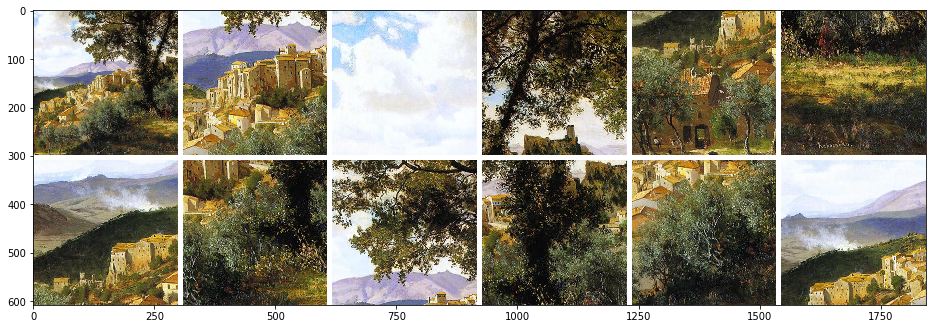

In [9]:
x = np.random.randint(len(file_names))

test_image = file_names[x]
artist = artist_labels[x]
#test_image = '73846.jpg'
#test_image = '58330.jpg'

# Locate file in train or test folder of Painter by Numbers dataset
if os.path.isfile(input_dir_1 + test_image):
    input_dir = input_dir_1
else:
    input_dir = input_dir_2

print(artist+'_'+test_image)

x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, y1, y2 = create_corner_crops(input_dir + test_image)

w = 309
i = Image.new('RGB', (w*6-10,w*2-10), color=(255,255,255,0))
i.paste(x1, (0, 0))
i.paste(x0, (1*w, 0))
i.paste(x2, (2*w, 0))
i.paste(x3, (3*w, 0))
i.paste(x4, (4*w, 0))
i.paste(x5, (5*w, 0))
i.paste(y1, (0, w))
i.paste(y2, (1*w, w))
i.paste(x6, (2*w, w))
i.paste(x7, (3*w, w))
i.paste(x8, (4*w, w))
i.paste(x9, (5*w, w))

plt.figure(figsize=(16,14))
plt.imshow(i)

In [10]:
i.save('plots/cropper_'+artist+'_'+test_image)